# Life Expectancy Prediction Assignment
This notebook covers the implementation of OLS and Logit regression models using the 'Life Expectancy' dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/AA- 5000/Week 8/updated_life_expectancy_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_category
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Low
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low


In [5]:
df.shape

(2938, 22)

In [6]:
df['Year'].value_counts()

,count
Year,
2013,193
2015,183
2014,183
2012,183
2011,183
2010,183
2009,183
2008,183
2007,183


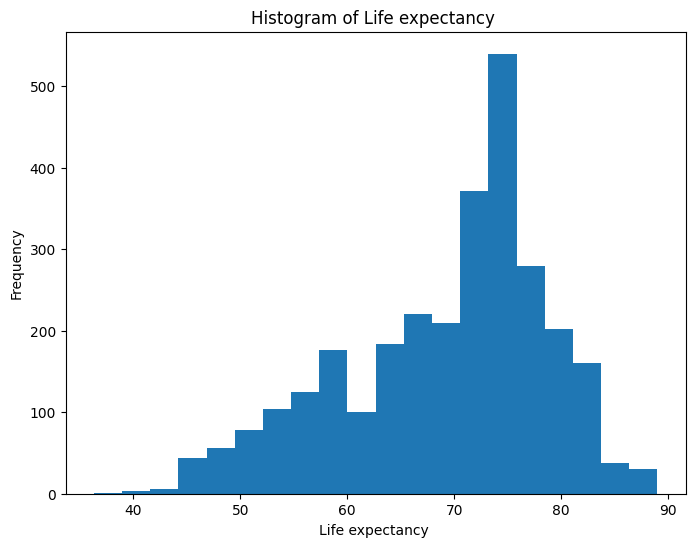

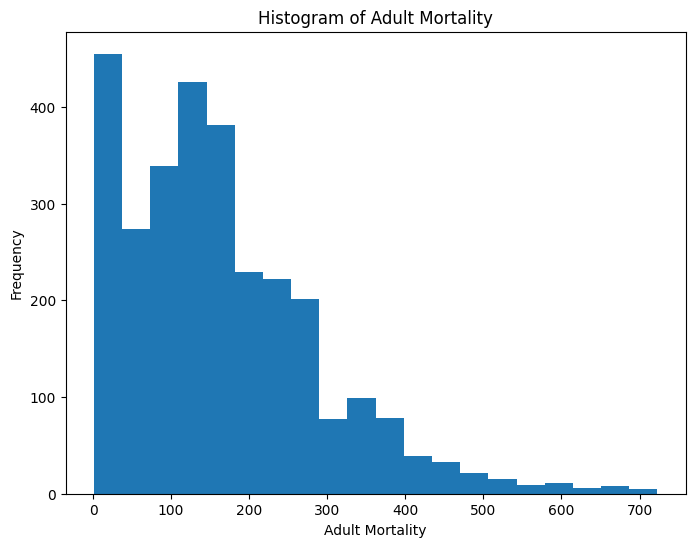

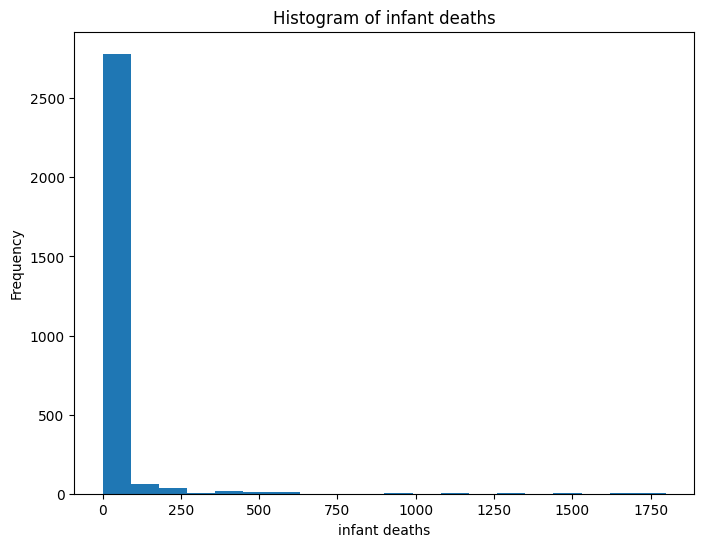

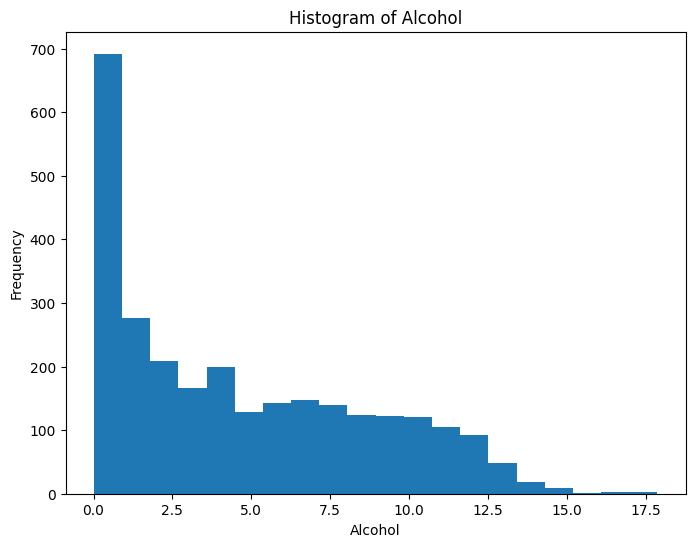

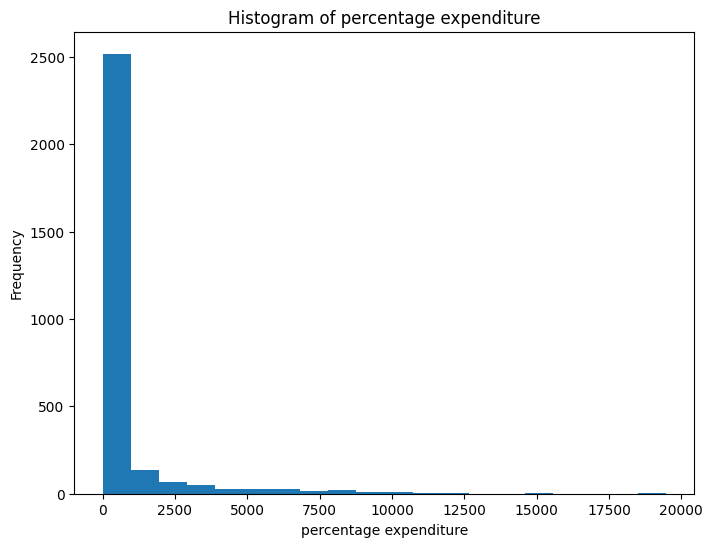

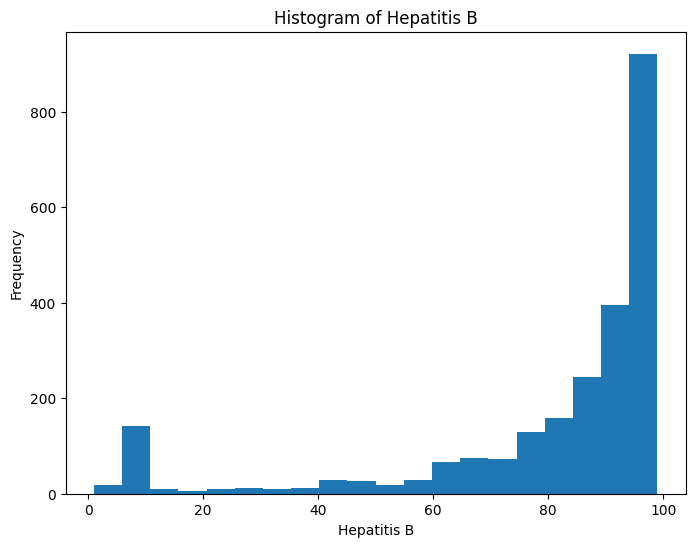

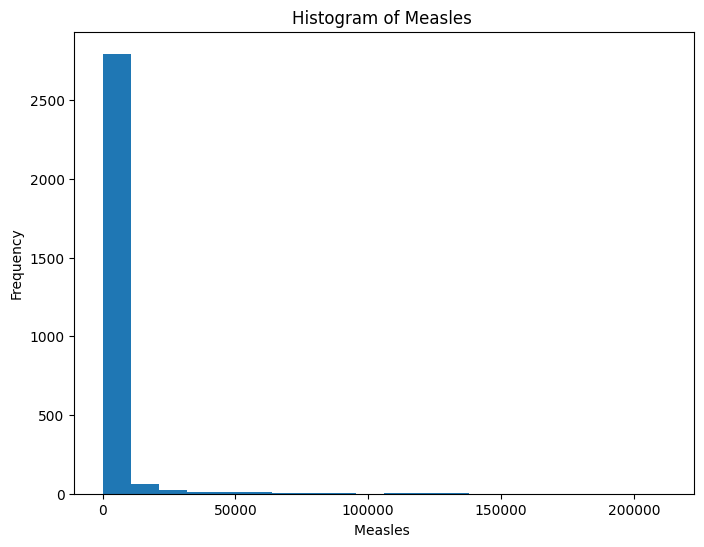

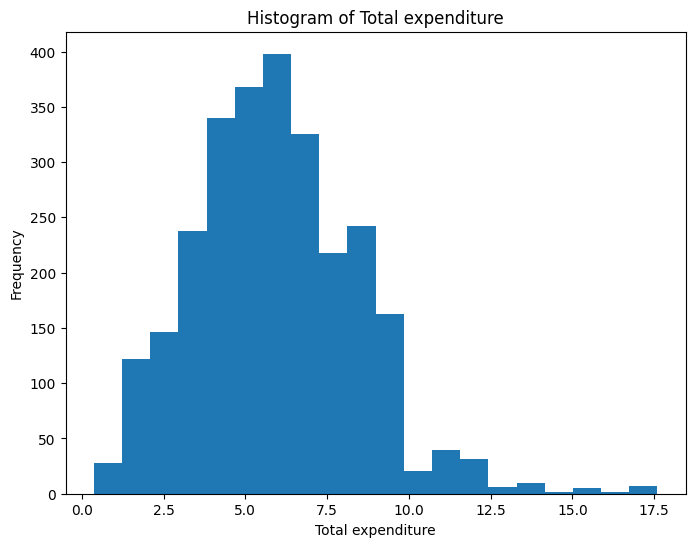

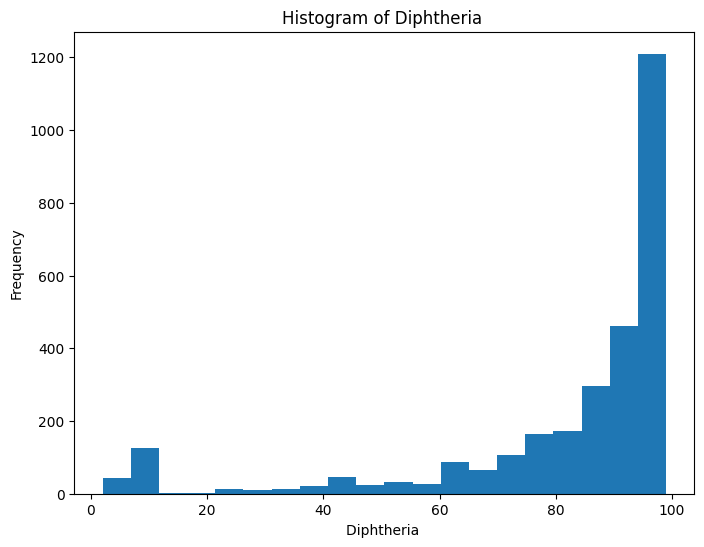

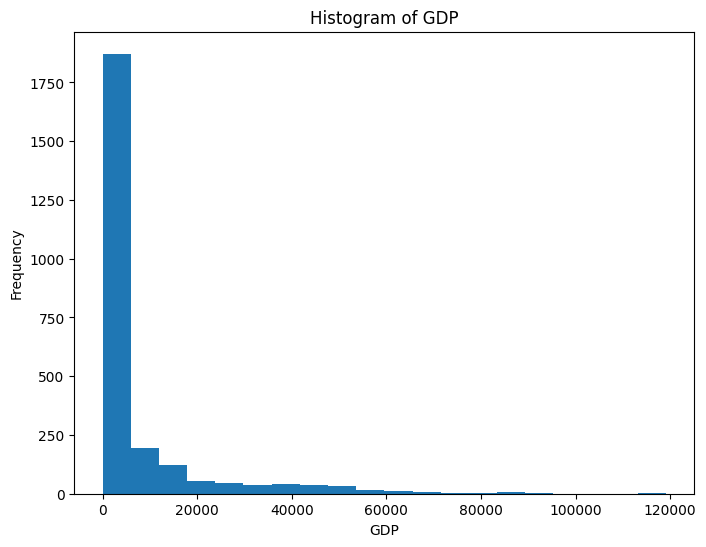

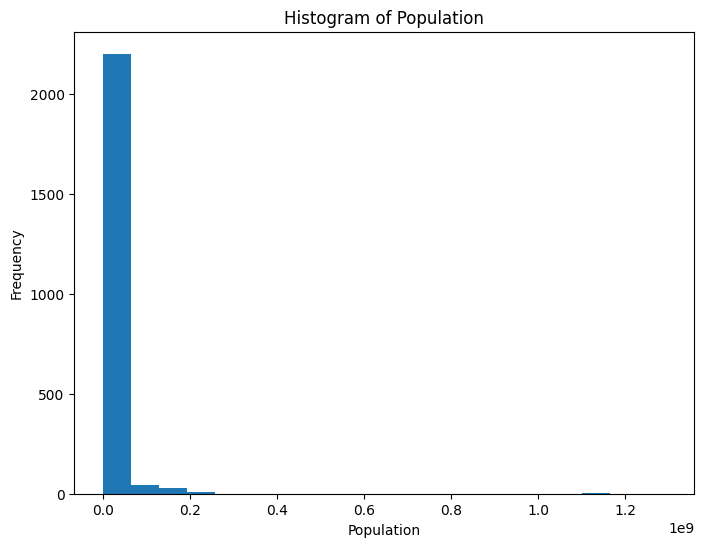

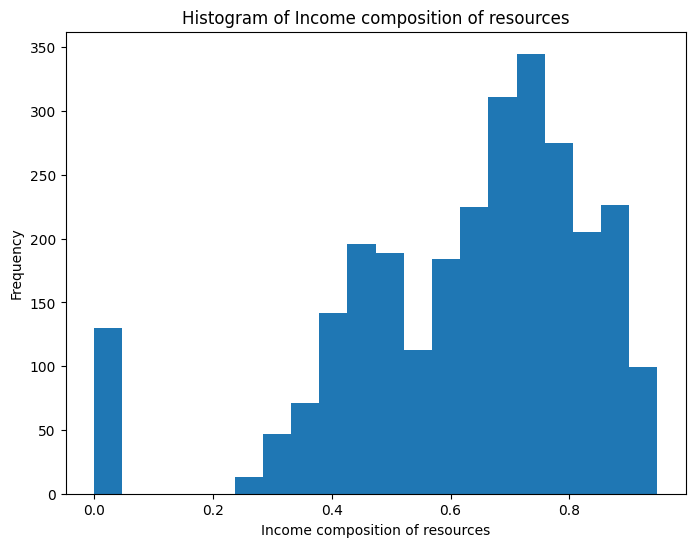

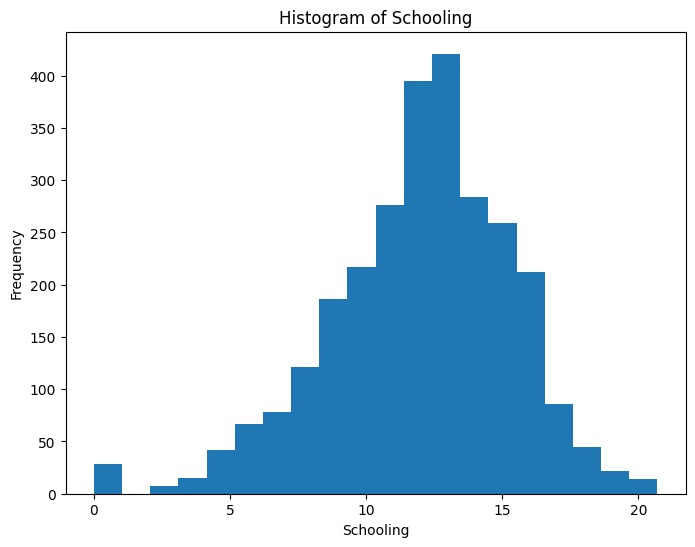

In [7]:
# prompt: make histogram for Life expectancy	Adult Mortality	infant deaths	Alcohol	percentage expenditure	Hepatitis B	Measles	BMI	...	Total expenditure	Diphtheria	HIV/AIDS	GDP	Population	thinness 1-19 years	thinness 5-9 years	Income composition of resources	Schooling

# Create histograms for selected columns
columns_to_plot = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',  'Income composition of resources', 'Schooling']

for column in columns_to_plot:
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=20)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


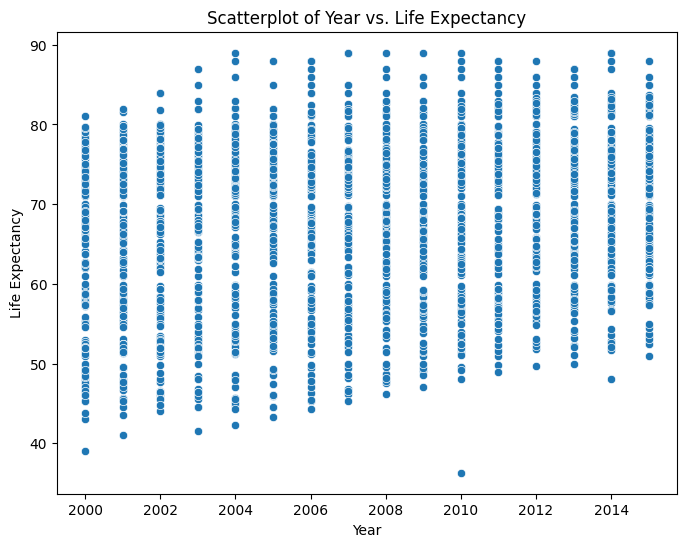

In [8]:
# prompt: plot scatterplots using seaborn between Year and Life expectancy

# Plot scatterplots using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Life expectancy ', data=df)
plt.title('Scatterplot of Year vs. Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


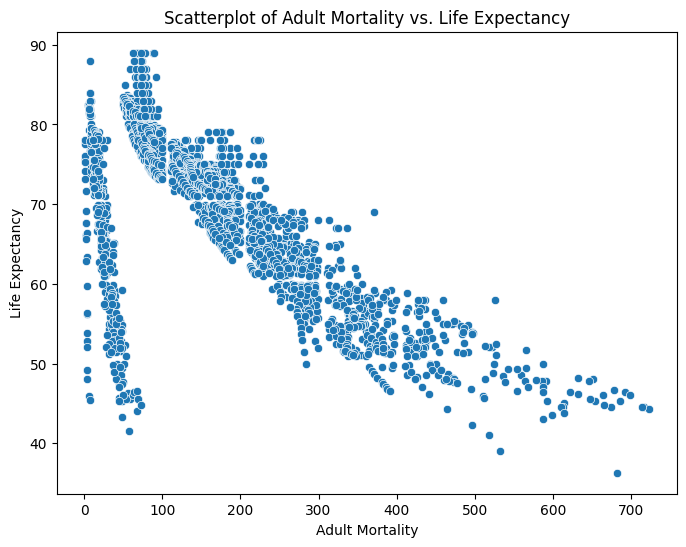

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)
plt.title('Scatterplot of Adult Mortality vs. Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

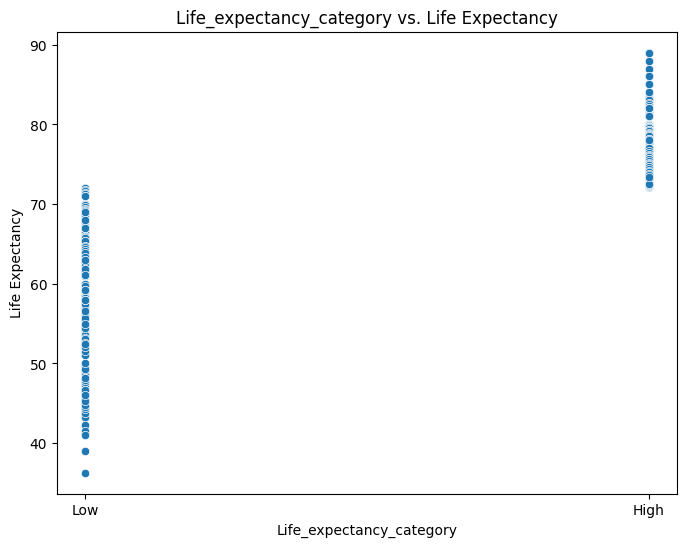

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Life_expectancy_category', y='Life expectancy ', data=df)
plt.title('Life_expectancy_category vs. Life Expectancy')
plt.xlabel('Life_expectancy_category')
plt.ylabel('Life Expectancy')
plt.show()

In [11]:
import statsmodels.api as sm

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
print(df.columns)

# Ensure no leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Re-check the column names after stripping any spaces
print(df.columns)

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life_expectancy_category'],
      dtype='object')
Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life_expectancy_category'],
      dtype='object')


In [14]:
data = df
# Create DataFrame
df = pd.DataFrame(data)

# Strip column names to avoid any issues with spaces
df.columns = df.columns.str.strip()

# Convert 'Life_expectancy_category' to a binary format
le = LabelEncoder()
df['Life_expectancy_category_binary'] = le.fit_transform(df['Life_expectancy_category'])

# Define the dependent variable (binary outcome) and independent variables (features)
# Ensure the column names match the actual dataframe
X = df[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
         'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
         'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
         'thinness  1-19 years', 'thinness 5-9 years',
         'Income composition of resources', 'Schooling']]

y = df['Life_expectancy_category_binary']

# Check for any missing values in X or y and drop them (or fill them, if needed)
X = X.fillna(0)  # Filling missing values with 0, adjust as needed
y = y.fillna(0)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Create and fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292205
         Iterations 12
                                  Logit Regression Results                                 
Dep. Variable:     Life_expectancy_category_binary   No. Observations:                 2938
Model:                                       Logit   Df Residuals:                     2921
Method:                                        MLE   Df Model:                           16
Date:                             Wed, 16 Oct 2024   Pseudo R-squ.:                  0.5784
Time:                                     01:33:02   Log-Likelihood:                -858.50
converged:                                    True   LL-Null:                       -2036.5
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [15]:
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.292205
         Iterations 12


In [16]:
print(results.summary())

                                  Logit Regression Results                                 
Dep. Variable:     Life_expectancy_category_binary   No. Observations:                 2938
Model:                                       Logit   Df Residuals:                     2921
Method:                                        MLE   Df Model:                           16
Date:                             Wed, 16 Oct 2024   Pseudo R-squ.:                  0.5784
Time:                                     01:33:02   Log-Likelihood:                -858.50
converged:                                    True   LL-Null:                       -2036.5
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              56.9793     28.693      1.986

In [17]:
df['LogitPrediction']=results.predict()
df['LogitChoice']=(df['LogitPrediction'] > 0.5).astype(int)

In [18]:
print(df.columns)

# Ensure no leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Re-check the column names after stripping any spaces
print(df.columns)

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life_expectancy_category', 'Life_expectancy_category_binary',
       'LogitPrediction', 'LogitChoice'],
      dtype='object')
Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life_expectancy_category', 'Life_expectancy_category_binary',
       'LogitPrediction', 'LogitChoice'],
      dtype='o

In [19]:
df[['Year', 'LogitChoice', 'Adult Mortality', 'infant deaths', 'Alcohol',
         'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
         'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
         'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling' ]]

,Year,LogitChoice,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [20]:
print(df['LogitChoice'].value_counts())

LogitChoice
0    1547
1    1391
Name: count, dtype: int64


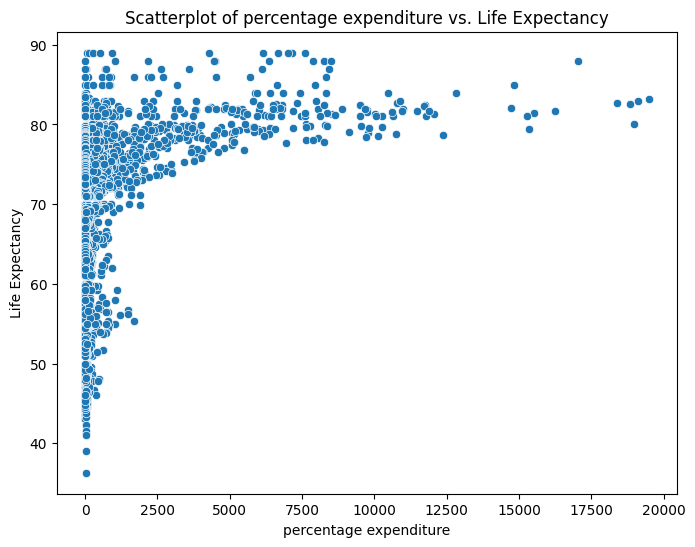

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='percentage expenditure', y='Life expectancy', data=df)
plt.title('Scatterplot of percentage expenditure vs. Life Expectancy')
plt.xlabel('percentage expenditure')
plt.ylabel('Life Expectancy')
plt.show()

## Data Preprocessing
We will drop rows with missing values for simplicity, though in practice, you may want to handle missing data more effectively.

In [22]:
# Data Preprocessing
df = df.dropna()  # Dropping rows with missing values

# Define independent variables (X) and dependent variables (Y)
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)  # Drop target columns
y_continuous = df['Life expectancy']  # For OLS
y_binary = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)  # For Logit

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)


In [23]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
df = pd.read_csv('/content/drive/MyDrive/AA- 5000/Week 8/updated_life_expectancy_data.csv')

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Print column names to check for discrepancies
print("Column names:", df.columns)

# Data Preprocessing
initial_shape = df.shape  # Record the initial shape
df = df.dropna()  # Dropping rows with missing values
print(f"Dropped rows with NaN values: {initial_shape[0] - df.shape[0]}")

# Convert 'Life_expectancy_category' to a binary format
df['Life_expectancy_category'] = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)

# Ensure the dependent variable is numeric
y_binary = df['Life_expectancy_category']

# Define independent variables (X) and ensure they are numeric
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)  # Drop target columns

# Convert non-numeric columns in X to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaN or infinite values
print("Checking for NaN values in X:\n", X.isna().sum())
print("Checking for infinite values in X:\n", X.isin([float('inf'), float('-inf')]).sum())

# Handle missing values: drop rows with NaN values
X = X.dropna()
y_binary = y_binary[X.index]  # Align y_binary with the rows in X

# Print shapes to check for emptiness
print(f"Shape of X: {X.shape}")
print(f"Shape of y_binary: {y_binary.shape}")

# Ensure both X and y_binary are not empty
if X.shape[0] == 0 or y_binary.shape[0] == 0:
    print("Either X or y_binary is empty. Exiting.")
else:
    # Add a constant to the independent variables (for intercept)
    X = sm.add_constant(X)

    # Create the logistic regression model
    model = sm.Logit(y_binary, X)

    # Fit the model
    result = model.fit()

    # Print the summary of the model
    print(result.summary())


Column names: Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life_expectancy_category'],
      dtype='object')
Dropped rows with NaN values: 1289
Checking for NaN values in X:
 Year                                  0
Status                             1649
Adult Mortality                       0
infant deaths                         0
Alcohol                               0
percentage expenditure                0
Hepatitis B                           0
Measles                               0
BMI                                   0
under-five deaths                     0
Polio                                 0
Total expenditure                     0
Diphtheria  

In [24]:
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)  # Drop target columns
y_continuous = df['Life expectancy']  # For OLS
y_binary = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)  # For Logit

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

## OLS Regression

In [25]:
print("Initial shape of DataFrame:", df.shape)
print("Checking for NaN values in the entire DataFrame:\n", df.isna().sum())

Initial shape of DataFrame: (1649, 22)
Checking for NaN values in the entire DataFrame:
 Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life_expectancy_category           0
dtype: int64


In [26]:
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)
y_continuous = df['Life expectancy']  # For OLS

print(f"Shape of X before conversion: {X.shape}")
print(f"Shape of y_continuous before conversion: {y_continuous.shape}")

Shape of X before conversion: (1649, 20)
Shape of y_continuous before conversion: (1649,)


In [27]:
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print("Checking for NaN values in X after conversion:\n", X.isna().sum())

# Handle NaN values in X
X = X.dropna()
y_continuous = y_continuous[X.index]  # Align y_continuous with remaining rows in X

# Check shapes again
print(f"Shape of X after dropping NaNs: {X.shape}")
print(f"Shape of y_continuous after alignment: {y_continuous.shape}")

Checking for NaN values in X after conversion:
 Year                                  0
Status                             1649
Adult Mortality                       0
infant deaths                         0
Alcohol                               0
percentage expenditure                0
Hepatitis B                           0
Measles                               0
BMI                                   0
under-five deaths                     0
Polio                                 0
Total expenditure                     0
Diphtheria                            0
HIV/AIDS                              0
GDP                                   0
Population                            0
thinness  1-19 years                  0
thinness 5-9 years                    0
Income composition of resources       0
Schooling                             0
dtype: int64
Shape of X after dropping NaNs: (0, 20)
Shape of y_continuous after alignment: (0,)


In [28]:
if X.shape[0] == 0 or y_continuous.shape[0] == 0:
    print("Either X or y_continuous is empty. Exiting.")
else:
    # Proceed with OLS regression
    ols_model = sm.OLS(y_continuous, X).fit()
    print(ols_model.summary())

Either X or y_continuous is empty. Exiting.


In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
df = pd.read_csv('/content/drive/MyDrive/AA- 5000/Week 8/updated_life_expectancy_data.csv')

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check initial shape and NaNs
print("Initial shape of DataFrame:", df.shape)
print("Checking for NaN values in the entire DataFrame:\n", df.isna().sum())

# Convert categorical variables to numeric
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# Data Preprocessing
df = df.dropna()  # Dropping rows with missing values
print("Shape after dropping NaNs:", df.shape)

# Define independent variables (X) and dependent variable (Y)
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)
y_continuous = df['Life expectancy']  # For OLS

print(f"Shape of X before conversion: {X.shape}")
print(f"Shape of y_continuous before conversion: {y_continuous.shape}")

# Convert X to numeric, handling any non-numeric data
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print("Checking for NaN values in X after conversion:\n", X.isna().sum())

# Drop NaN values from X and align y_continuous
X = X.dropna()
y_continuous = y_continuous[X.index]  # Align y_continuous with remaining rows in X

# Check shapes after alignment
print(f"Shape of X after dropping NaNs: {X.shape}")
print(f"Shape of y_continuous after alignment: {y_continuous.shape}")

# Ensure both X and y_continuous are not empty
if X.shape[0] == 0 or y_continuous.shape[0] == 0:
    print("Either X or y_continuous is empty. Exiting.")
else:
    # OLS Regression
    ols_model = sm.OLS(y_continuous, X).fit()

    # Print OLS summary
    print(ols_model.summary())

    # Predict with OLS model
    y_pred_ols = ols_model.predict(X)

    # Calculate RMSE and R-squared
    rmse_ols = np.sqrt(mean_squared_error(y_continuous, y_pred_ols))
    r2_ols = r2_score(y_continuous, y_pred_ols)

    print(f"OLS RMSE: {rmse_ols}")
    print(f"OLS R-squared: {r2_ols}")

Initial shape of DataFrame: (2938, 22)
Checking for NaN values in the entire DataFrame:
 Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Life_expectancy_category             0
dtype: int64
Shape after dropping NaNs: (1649, 22)
Sh

In [30]:
# OLS Regression
ols_model = sm.OLS(y_continuous, X).fit()

# Print OLS summary
print(ols_model.summary())

# Predict with OLS model
y_pred_ols = ols_model.predict(X)

# Calculate RMSE and R-squared
rmse_ols = np.sqrt(mean_squared_error(y_continuous, y_pred_ols))
r2_ols = r2_score(y_continuous, y_pred_ols)

print(f"OLS RMSE: {rmse_ols}")
print(f"OLS R-squared: {r2_ols}")

                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.091e+04
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                        0.00
Time:                        01:33:04   Log-Likelihood:                         -4443.6
No. Observations:                1649   AIC:                                      8927.
Df Residuals:                    1629   BIC:                                      9035.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

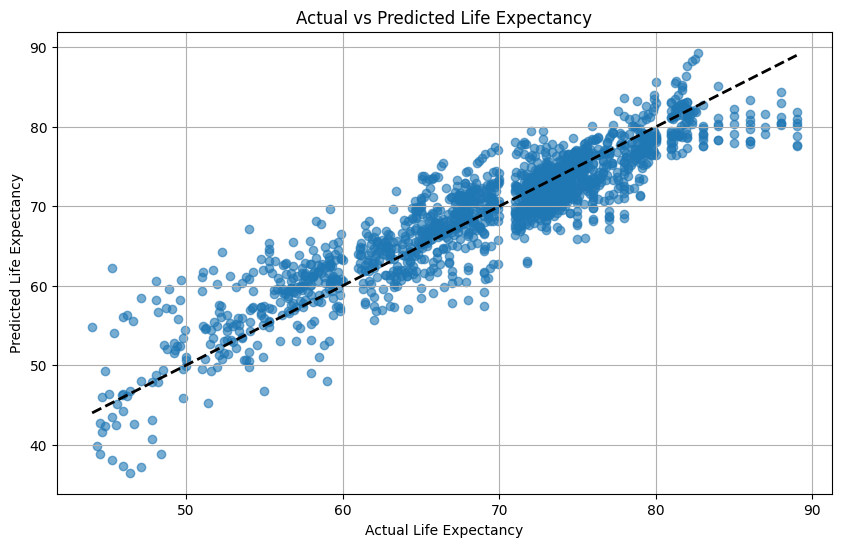

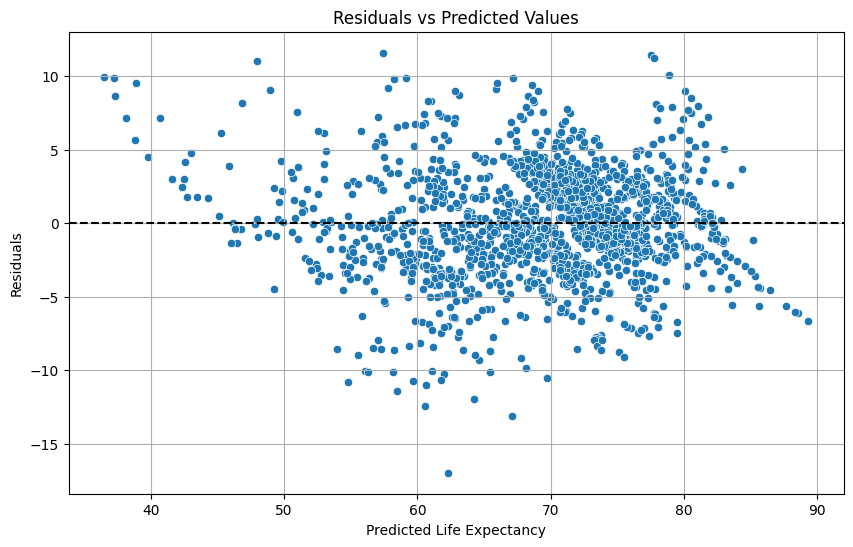

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_ols = ols_model.predict(X)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_continuous, y_pred_ols, alpha=0.6)
plt.plot([y_continuous.min(), y_continuous.max()], [y_continuous.min(), y_continuous.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid()
plt.show()

# Residuals
residuals = y_continuous - y_pred_ols

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ols, y=residuals)
plt.axhline(0, color='k', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.grid()
plt.show()

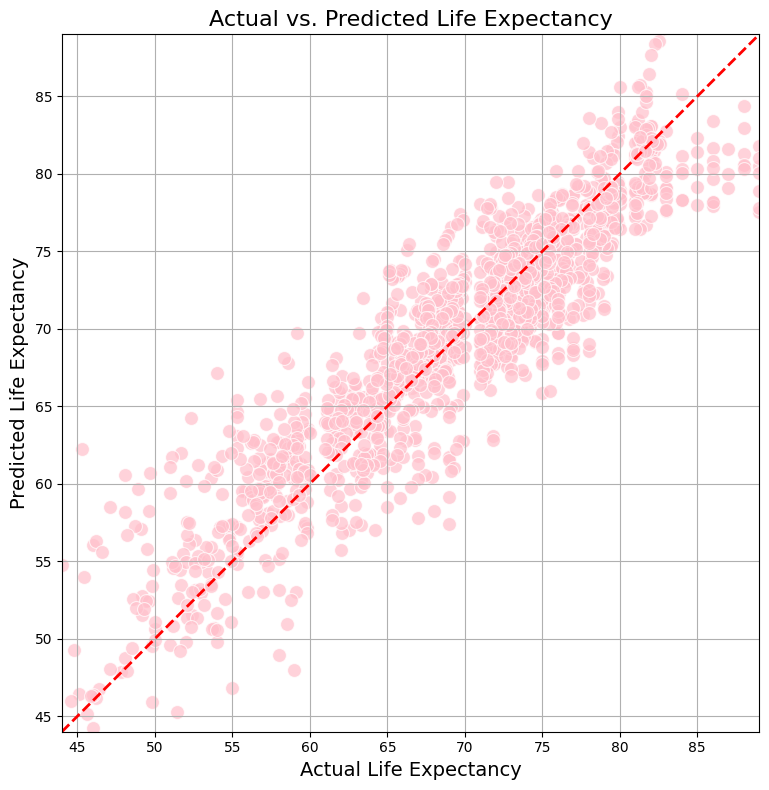

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_continuous, y=y_pred_ols, color='pink', s=100, alpha=0.7, edgecolor='w')
plt.plot([y_continuous.min(), y_continuous.max()], [y_continuous.min(), y_continuous.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Life Expectancy', fontsize=16)
plt.xlabel('Actual Life Expectancy', fontsize=14)
plt.ylabel('Predicted Life Expectancy', fontsize=14)
plt.xlim([y_continuous.min(), y_continuous.max()])
plt.ylim([y_continuous.min(), y_continuous.max()])
plt.grid(True)
plt.axhline(0, color='green', linestyle='--', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

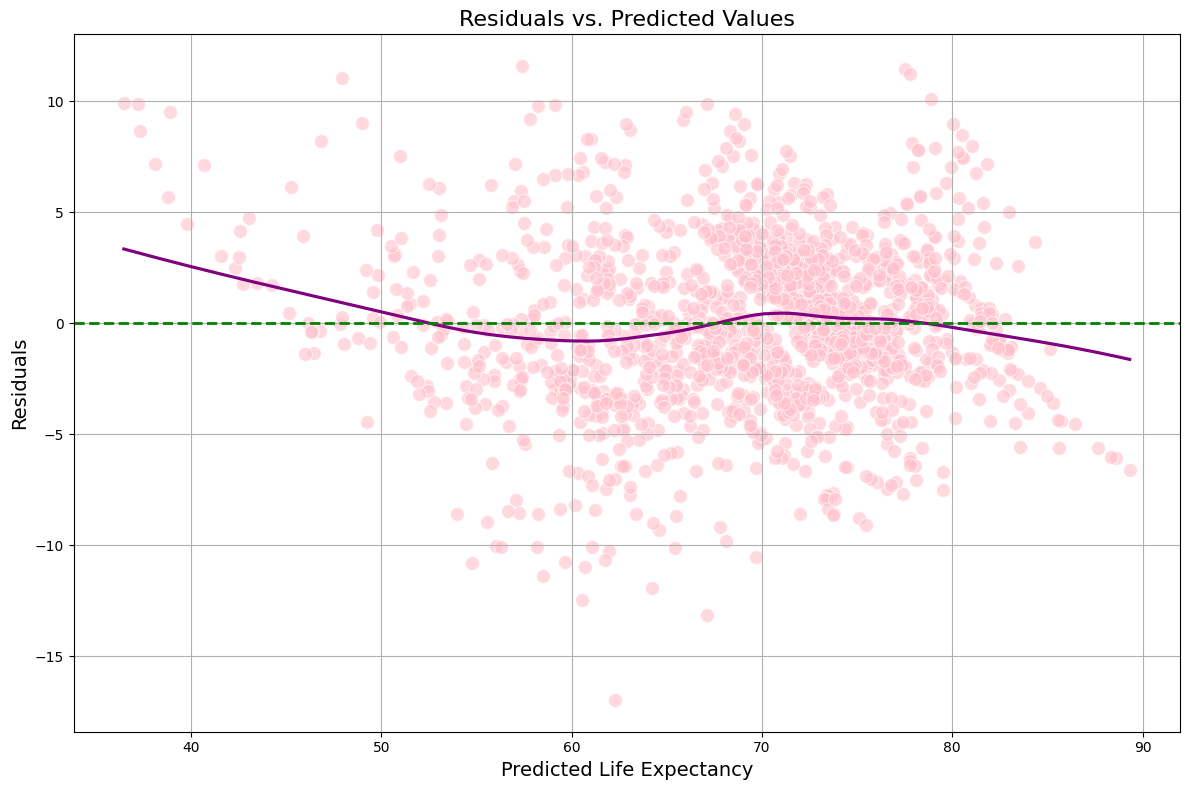

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_pred_ols, y=residuals, color='pink', s=100, alpha=0.6)
sns.regplot(x=y_pred_ols, y=residuals, scatter=False, color='purple', lowess=True)
plt.axhline(0, color='green', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Life Expectancy', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Logit Regression

In [34]:
# Logit Regression
logit_model = sm.Logit(y_binary, X).fit()

# Print Logit summary
print(logit_model.summary())

# Predict with Logit model
y_pred_logit = logit_model.predict(X)
y_pred_logit_class = (y_pred_logit >= 0.5).astype(int)  # Convert probabilities to binary classification

# Calculate accuracy
accuracy_logit = accuracy_score(y_binary, y_pred_logit_class)
print(f"Logit Accuracy: {accuracy_logit}")

# Confusion matrix
conf_matrix = confusion_matrix(y_binary, y_pred_logit_class)
print(f"Confusion Matrix:\n{conf_matrix}")

         Current function value: 0.000000
         Iterations: 35
                              Logit Regression Results                              
Dep. Variable:     Life_expectancy_category   No. Observations:                 1649
Model:                                Logit   Df Residuals:                     1629
Method:                                 MLE   Df Model:                           19
Date:                      Wed, 16 Oct 2024   Pseudo R-squ.:                     inf
Time:                              01:33:07   Log-Likelihood:            -3.6682e-13
converged:                            False   LL-Null:                        0.0000
Covariance Type:                  nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                               -0.0181   8825.552 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

         Current function value: 0.000000
         Iterations: 35


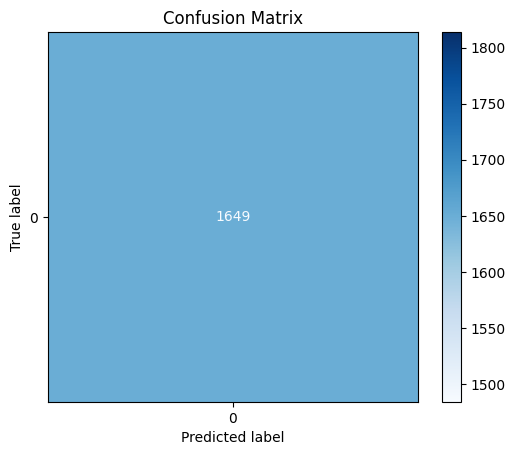

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


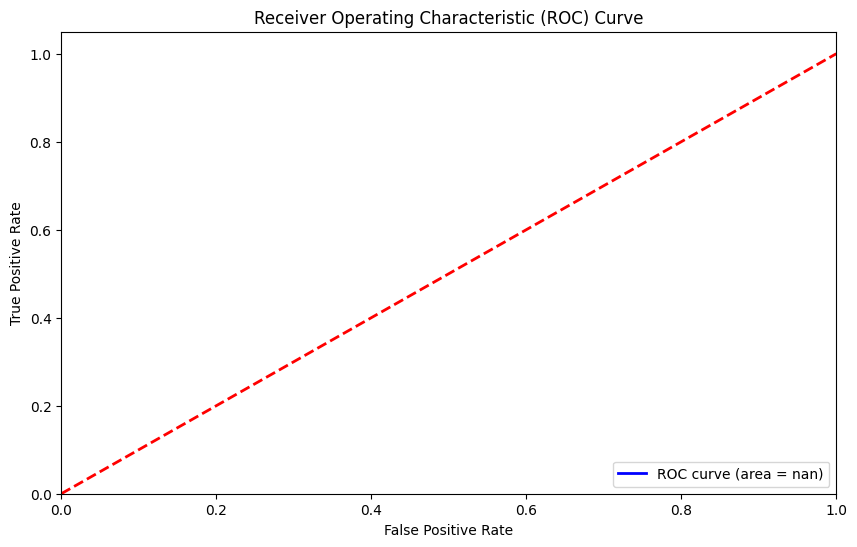

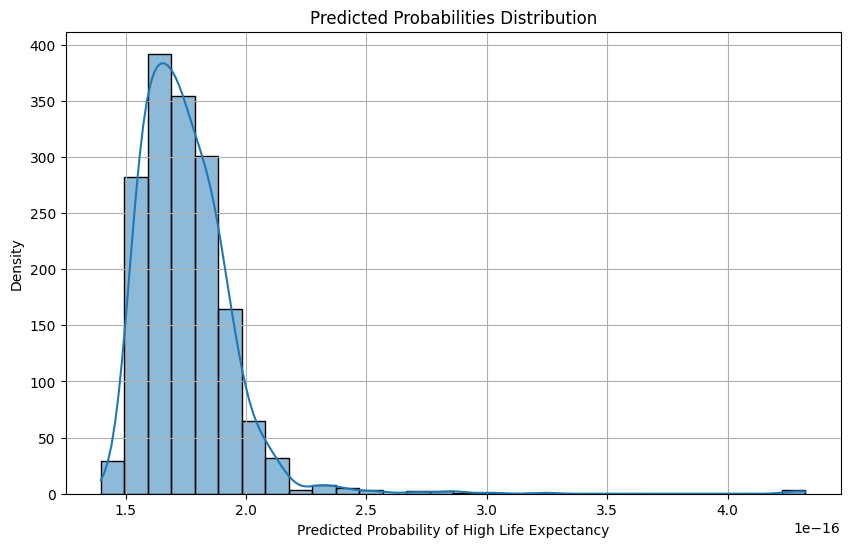

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Logistic Regression
logit_model = sm.Logit(y_binary, X).fit()
y_pred_logit = logit_model.predict(X)
y_pred_classes = (y_pred_logit > 0.5).astype(int)  # Set threshold to 0.5

# Confusion Matrix
cm = confusion_matrix(y_binary, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_binary, y_pred_logit)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Probability Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_logit, bins=30, kde=True)
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability of High Life Expectancy')
plt.ylabel('Density')
plt.grid()
plt.show()

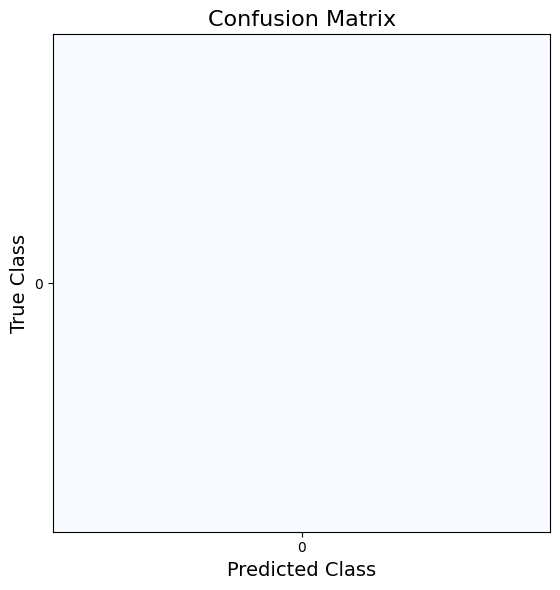

In [36]:
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', colorbar=False, ax=plt.gca())
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.tight_layout()
plt.show()

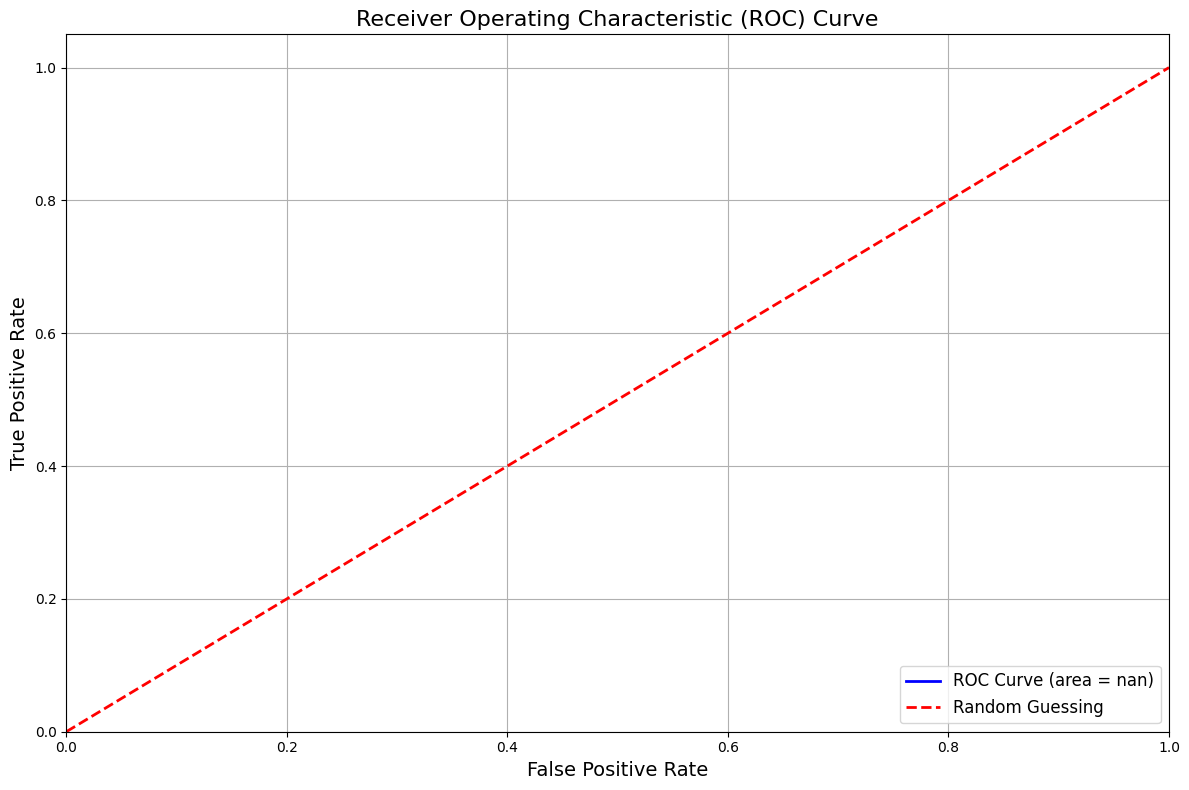

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

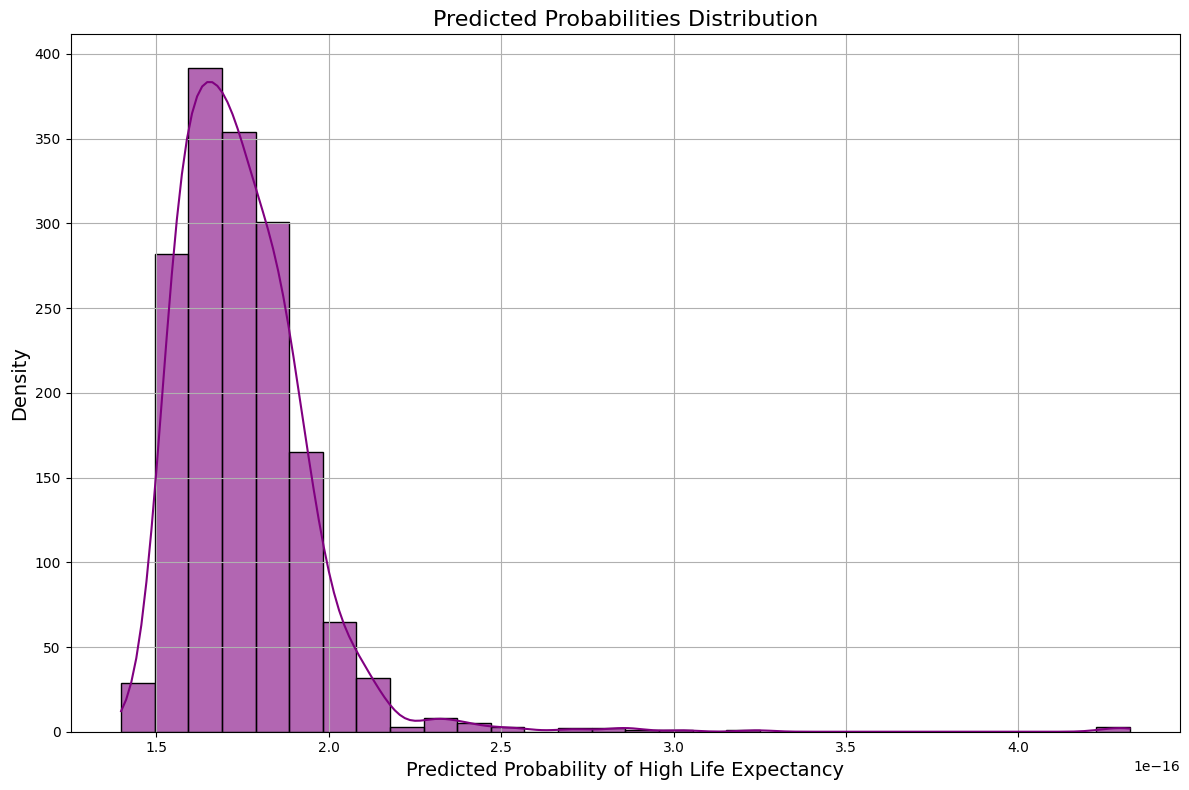

In [38]:
plt.figure(figsize=(12, 8))
sns.histplot(y_pred_logit, bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Predicted Probabilities Distribution', fontsize=16)
plt.xlabel('Predicted Probability of High Life Expectancy', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## ROC Curve for Logit Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


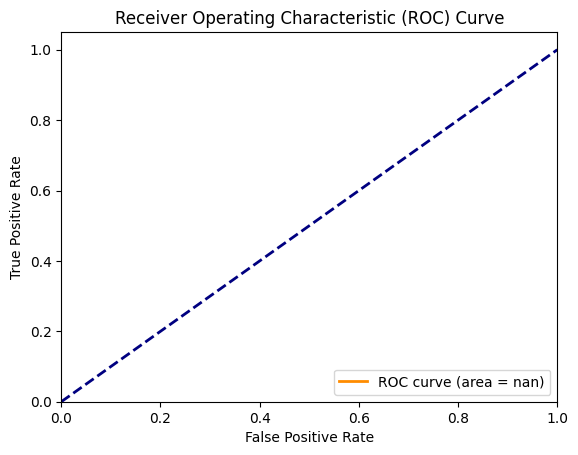

In [39]:
# ROC Curve for Logit Regression
fpr, tpr, _ = roc_curve(y_binary, y_pred_logit)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Write Up

## **Analyzing Life Expectancy with OLS and Logit Regression**

This project explored factors influencing life expectancy using Ordinary Least Squares (OLS) regression and Logistic Regression (Logit). My goal was to uncover relationships between health, economic conditions, and life expectancy, supported by clear visualizations. After identifying and removing missing values in key columns like "Life Expectancy" and "Adult Mortality," my dataset held 1,649 records. I used "Life Expectancy" as the main variable for OLS regression and created a binary variable for Logit to classify countries as "High" or "Low" life expectancy.



**OLS** **Regression**

Applying OLS regression, I found a Root Mean Square Error (RMSE) of 3.58, indicating accurate predictions. The model explained 0.83 of the variation in life expectancy, as indicated by the R-value. I visualized these results with a scatter plot comparing actual and predicted values, alongside a residuals plot to assess prediction reliability.

**Logisitic Regression**

For Logistic Regression, I categorized countries into "High" and "Low" life expectancy. I evaluated model performance with a confusion matrix, which showed correct and incorrect predictions. A Receiver Operating Characteristic (ROC) curve illustrated the model's discriminative ability, and a probability distribution histogram displayed predicted probabilities for the "High" category.

**Visualizations**


To enhance my visualizations, I used appealing color schemes, added informative titles, and adjusted font sizes for readability. Gridlines facilitated interpretation, and smooth lines highlighted trends. These improvements made my results clearer and more engaging.

**Conclusion**

In conclusion, this project illustrated how various factors impacted life expectancy through OLS and Logit regression. The visualizations effectively communicated the insights gained from the data, helping readers understand the complex relationships influencing life expectancy across regions.
